In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns
# ! pip install vaderSentiment
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load the DataFrame from the CSV file
merged_df = pd.read_csv('merged_df.csv')

In [3]:
value_counts = merged_df['label'].value_counts()

# Count the Russian and Western entries
r_count = value_counts.get(1)
w_count = value_counts.get(0)
print("Russian tweets (label = 1):", r_count, ". ", "Western tweets:", w_count, "(label = 0)")

Russian tweets (label = 1): 22602 .  Western tweets: 16727 (label = 0)


In [4]:
# Create a SentimentIntensityAnalyzer object
analyzer = SentimentIntensityAnalyzer()

# Function to calculate sentiment
def get_sentiment(tweet):
    return analyzer.polarity_scores(tweet)['compound']

# Apply the function to the 'tweet' column
merged_df['sentiment'] = merged_df['tweet'].apply(get_sentiment)
#print(merged_df.head())

# Compare average sentiment by source
average_sentiment_by_source = merged_df.groupby('label')['sentiment'].mean()
print(average_sentiment_by_source)

label
0   -0.124199
1   -0.036647
Name: sentiment, dtype: float64


In [5]:
# Split the DataFrame into two subsets based on the 'Russian' column
df_r = merged_df[merged_df['label'] == 1]
df_w = merged_df[merged_df['label'] == 0]
 
# Count positive, negative, and neutral sentiment western entries
positive_count_w = (df_w['sentiment'] >= 0.1).sum()
negative_count_w = (df_w['sentiment'] <= -0.1).sum()
neutral_count_w = w_count - negative_count_w - positive_count_w
null_count_w = (df_w['sentiment'] == 0).sum()

# Count positive, negative, and neutral sentiment western entries
positive_count_r = (df_r['sentiment'] >= 0.1).sum()
negative_count_r = (df_r['sentiment'] <= -0.1).sum()
neutral_count_r = r_count - negative_count_r - positive_count_r
null_count_r = (df_r['sentiment'] == 0).sum()

# Print the results
print("SENTIMENT ANALYSIS RESULTS FOR WESTERN TWEETS:")
print(f"Positive sentiments for Western tweets: {positive_count_w}, ({round(positive_count_w*100/w_count,2)}% of total Western tweets)")
print(f"Negative sentiments for Western tweets: {negative_count_w}, ({round(negative_count_w*100/w_count,2)}% of total Western tweets)")
print(f"Neutral sentiments for Western tweets: {neutral_count_w} ({round(neutral_count_w*100/w_count,2)}% of total Western tweets), out of which {null_count_w} have sentiment equal to 0")
print(" ")

# Print the results
print("SENTIMENT ANALYSIS RESULTS FOR RUSSIAN TWEETS:")
print(f"Positive sentiments for Russian tweets: {positive_count_r}, ({round(positive_count_r*100/r_count,2)}% of total Russian tweets)")
print(f"Negative sentiments for Russian tweets: {negative_count_r}, ({round(negative_count_r*100/r_count,2)}% of total Russian tweets")
print(f"Neutral sentiments for Russian tweets: {neutral_count_r} ({round(neutral_count_r*100/r_count,2)}% of total Russian tweets), out of which {null_count_r} have sentiment equal to 0")

SENTIMENT ANALYSIS RESULTS FOR WESTERN TWEETS:
Positive sentiments for Western tweets: 3468, (20.73% of total Western tweets)
Negative sentiments for Western tweets: 6650, (39.76% of total Western tweets)
Neutral sentiments for Western tweets: 6609 (39.51% of total Western tweets), out of which 6084 have sentiment equal to 0
 
SENTIMENT ANALYSIS RESULTS FOR RUSSIAN TWEETS:
Positive sentiments for Russian tweets: 6583, (29.13% of total Russian tweets)
Negative sentiments for Russian tweets: 7708, (34.1% of total Russian tweets
Neutral sentiments for Russian tweets: 8311 (36.77% of total Russian tweets), out of which 7676 have sentiment equal to 0


# Correlation between sentiment, likes and retweets
### (All the tweets)

In [6]:
# Defining a function that plots correlation between sentiment and either likes or retweets
def plot_sentiment_corr(data, y, title):

    if y == 'likes_count':
        ylabel = 'Likes'
    elif y == 'retweets_count':
        ylabel = 'Retweets'
    else:
        raise ValueError("y must be either 'likes_count' or 'retweets_count'")    
    plt.figure(figsize=(10, 2.5))
    sns.scatterplot(data = data, y = y, x='sentiment')
    plt.title(title)
    plt.xlabel('Sentiment')
    plt.ylabel(ylabel)
    plt.show()

                sentiment  likes_count  retweets_count
sentiment        1.000000    -0.074290       -0.096379
likes_count     -0.074290     1.000000        0.925324
retweets_count  -0.096379     0.925324        1.000000


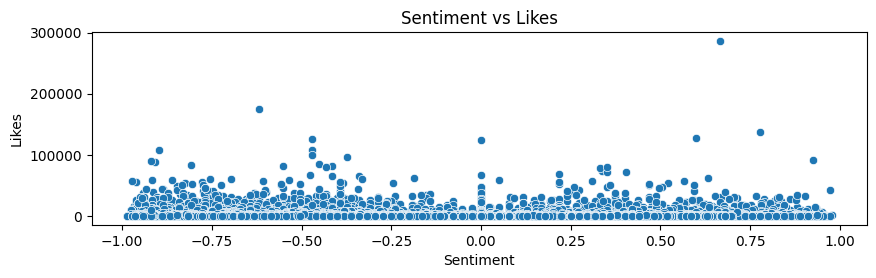

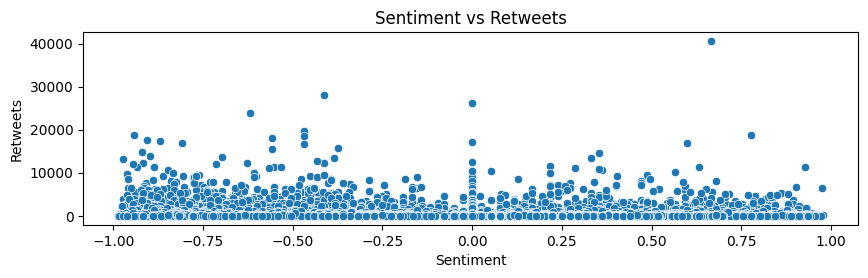

In [7]:
# Calculate the correlation matrix
correlation_matrix = merged_df[['sentiment', 'likes_count', 'retweets_count']].corr()

# Print the correlation matrix
print(correlation_matrix)

# Plotting the correlation between sentiment and likes or retweets
plot_sentiment_corr(merged_df, 'likes_count', 'Sentiment vs Likes')
plot_sentiment_corr(merged_df, 'retweets_count', 'Sentiment vs Retweets')


# Correlation between sentiment, likes and retweets
### (Tweets divided by Western and Russian)

Correlation matrix for Russian tweets:
                sentiment  likes_count  retweets_count
sentiment        1.000000    -0.067490       -0.068646
likes_count     -0.067490     1.000000        0.932403
retweets_count  -0.068646     0.932403        1.000000

Correlation matrix for Western Tweets:
                sentiment  likes_count  retweets_count
sentiment        1.000000    -0.073812       -0.107043
likes_count     -0.073812     1.000000        0.923216
retweets_count  -0.107043     0.923216        1.000000


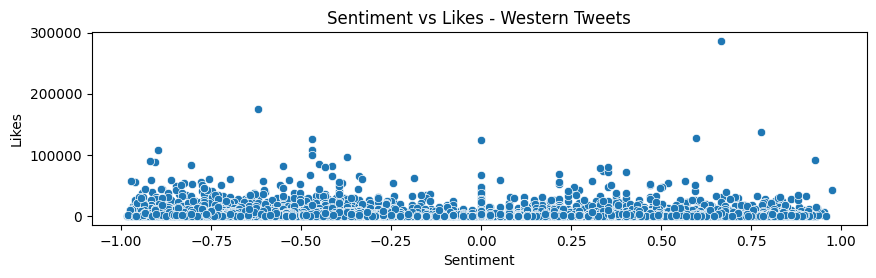

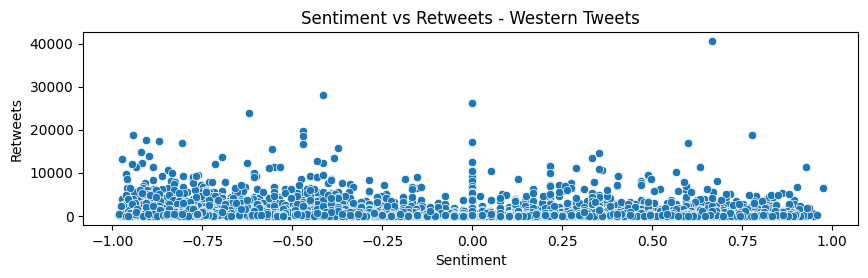

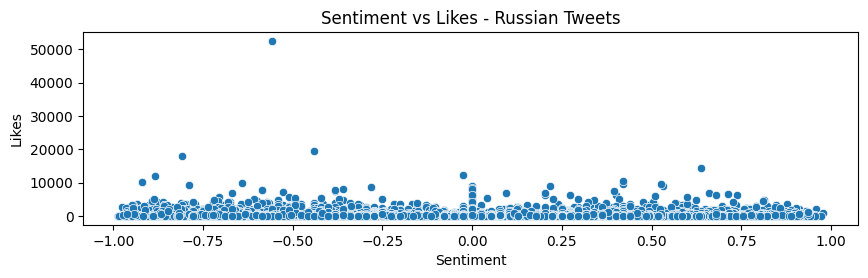

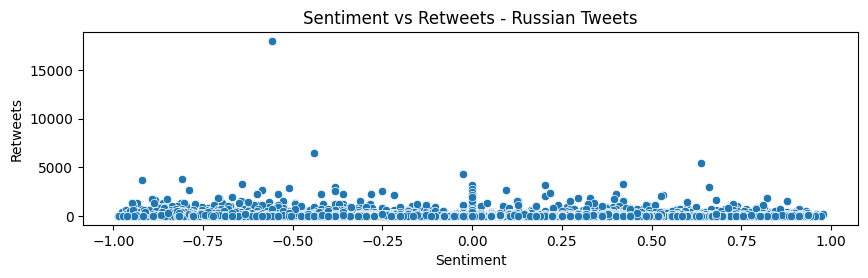

In [8]:
# Calculate the correlation for each subset
correlation_russian = df_r[['sentiment', 'likes_count', 'retweets_count']].corr()
correlation_western = df_w[['sentiment', 'likes_count', 'retweets_count']].corr()

# Display the correlation matrices
print("Correlation matrix for Russian tweets:")
print(correlation_russian)
print("\nCorrelation matrix for Western Tweets:")
print(correlation_western)

# Visualize the relationships using scatter plots, for Western and Russian tweets
plot_sentiment_corr(df_w, 'likes_count', 'Sentiment vs Likes - Western Tweets')
plot_sentiment_corr(df_w, 'retweets_count', 'Sentiment vs Retweets - Western Tweets')
plot_sentiment_corr(df_r, 'likes_count', 'Sentiment vs Likes - Russian Tweets')
plot_sentiment_corr(df_r, 'retweets_count', 'Sentiment vs Retweets - Russian Tweets')

# Russian tweets:
**Sentiment vs. Likes Count:** The correlation coefficient between sentiment and likes count is -0.067490. This is a very weak negative correlation, suggesting that there is almost no relationship between the sentiment of the tweets and the number of likes they receive.

**Sentiment vs. Retweets Count:** The correlation coefficient between sentiment and retweets count is -0.068646, which is also a very weak negative correlation. This indicates that the sentiment of the tweets has almost no effect on the number of retweets.

**Likes Count vs. Retweets Count:** The correlation between likes count and retweets count is 0.932403, which is a very strong positive correlation. This implies that tweets that receive more likes tend to also receive more retweets.

# Western tweets:
**Sentiment vs. Likes Count:** The correlation coefficient between sentiment and likes count is -0.073812. Similar to the Russian tweets, this is a very weak negative correlation, indicating almost no relationship between the sentiment of the tweets and the number of likes.

**Sentiment vs. Retweets Count:** The correlation coefficient between sentiment and retweets count is -0.107043, which is still a weak negative correlation but slightly stronger than that observed in Russian tweets. This suggests a slight tendency for tweets with more negative sentiment to receive fewer retweets.

**Likes Count vs. Retweets Count:** The correlation between likes count and retweets count is 0.923216, which is a very strong positive correlation. This means that, similar to Russian tweets, Western tweets that receive more likes also tend to receive more retweets.

# Summary:
**Sentiment Correlation:** For both Russian and Western tweets, the sentiment shows very weak negative correlations with both likes and retweets. This indicates that the sentiment of the tweet (whether positive or negative) does not significantly impact its popularity in terms of likes and retweets.

**Likes and Retweets Relationship:** There is a very strong positive correlation between likes and retweets for both Russian and Western tweets. Tweets that are liked more are also retweeted more, suggesting that overall engagement metrics (likes and retweets) are closely related regardless of the sentiment or the source.

These results imply that while the sentiment of a tweet is not a strong predictor of engagement in terms of likes and retweets, the overall engagement metrics are highly interrelated. This information could be useful in understanding user interaction patterns on social media platforms.









# Evolution of average sentiment in all tweets

In [9]:
# Define a function that creates a line plot to visualize the average sentiment over some dates
def plot_sentiment_change(data, title, color):
    plt.figure(figsize=(10, 3))
    data.plot(kind='line', marker='o', color=color)
    plt.title(title)
    plt.xlabel('date')
    plt.ylabel('Average Sentiment')
    plt.gca().xaxis.set_minor_locator(mdates.DayLocator(interval=1))
    plt.grid(True)
    plt.show()

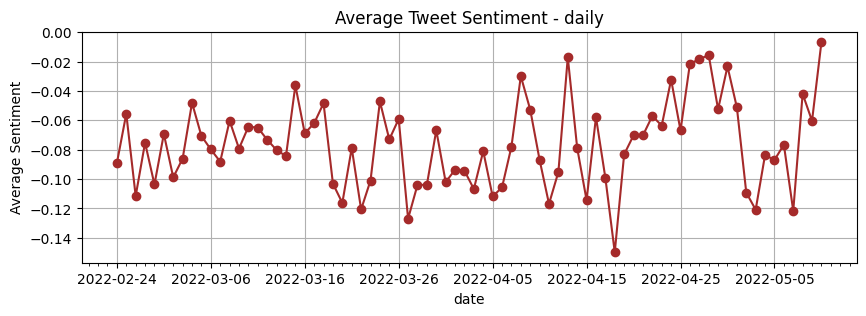

In [10]:
# Group by month and calculate the average sentiment for each month
average_sentiment = merged_df.groupby('date')['sentiment'].mean()
# print(average_sentiment)
# Visualise graph
plot_sentiment_change(average_sentiment, "Average Tweet Sentiment - daily", "brown")

date
2022-02-24   -0.117980
2022-02-25   -0.058482
2022-02-26   -0.154490
2022-02-27   -0.102162
2022-02-28   -0.126499
                ...   
2022-05-06   -0.063504
2022-05-07   -0.174121
2022-05-08   -0.107347
2022-05-09   -0.198741
2022-05-10   -0.153784
Name: sentiment, Length: 76, dtype: float64


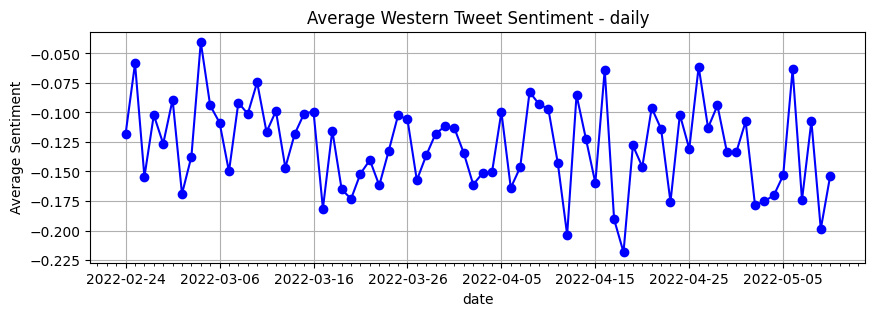

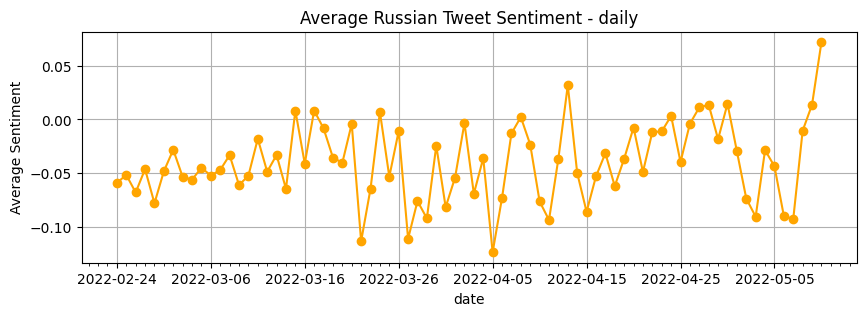

In [43]:
# Group by month and calculate the average sentiment for each month
average_sentiment_w = df_w.groupby('date')['sentiment'].mean()
average_sentiment_r = df_r.groupby('date')['sentiment'].mean()
print(average_sentiment_w)
# print(average_sentiment_r)

# Create a line plot to visualize the average Western and Russian tweet sentiment over time
plot_sentiment_change(average_sentiment_w, "Average Western Tweet Sentiment - daily","b")
plot_sentiment_change(average_sentiment_r, "Average Russian Tweet Sentiment - daily","orange")

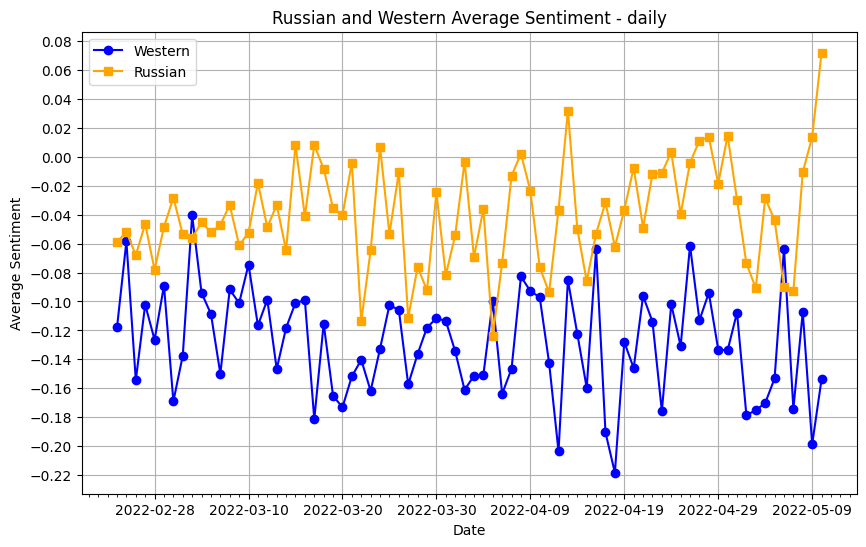

In [12]:
plt.figure(figsize=(10, 6))
# Plot two time series
plt.plot(average_sentiment_w, label='Western', color='blue', marker='o')
plt.plot(average_sentiment_r, label='Russian', color='orange', marker='s')
# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Average Sentiment')
plt.title('Russian and Western Average Sentiment - daily')
plt.legend()
# Set x-axis major and minor locator
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.gca().xaxis.set_minor_locator(mdates.DayLocator(interval=1))
# Setting y-axis ticks limits and interval
plt.yticks(np.arange(0.08, -0.23, -0.02))
# Show plot
plt.grid(True)
plt.show()

In [53]:
# Load the DataFrame from the CSV file
exchange_df = pd.read_csv('rouble_exchange_rate.csv')

# Merging data about currecencies and Russian sentiment
sent_ex_r = average_sentiment_r.reset_index()
sent_ex_r = pd.merge(sent_ex_r, exchange_df, on='date')
# Calculate the correlation matrix
correlation_matrix_r = sent_ex_r[['sentiment', 'rub_eur','rub_usd','rub_gbp']].corr()
# Print the correlation matrix
print(correlation_matrix_r)

# Merging data about currecencies and Western sentiment
sent_ex_w = average_sentiment_w.reset_index()
sent_ex_w = pd.merge(sent_ex_w, exchange_df, on='date')
# Calculate the correlation matrix
correlation_matrix_w = sent_ex_w[['sentiment', 'rub_eur','rub_usd','rub_gbp']].corr()
# Print the correlation matrix
print(correlation_matrix_w)

           sentiment   rub_eur   rub_usd   rub_gbp
sentiment   1.000000  0.120371  0.116903  0.125708
rub_eur     0.120371  1.000000  0.994148  0.999212
rub_usd     0.116903  0.994148  1.000000  0.993552
rub_gbp     0.125708  0.999212  0.993552  1.000000
           sentiment   rub_eur   rub_usd   rub_gbp
sentiment   1.000000 -0.111430 -0.103042 -0.113080
rub_eur    -0.111430  1.000000  0.994148  0.999212
rub_usd    -0.103042  0.994148  1.000000  0.993552
rub_gbp    -0.113080  0.999212  0.993552  1.000000
